In [2]:
!pip install dowhy
!pip install doubleml

     |████████████████████████████████| 123 kB 8.2 MB/s            
     |████████████████████████████████| 115 kB 8.2 MB/s            


In [3]:
import os, sys
import random
import numpy as np
import pandas as pd
from IPython.display import Image, display

from dowhy import CausalModel

from doubleml.datasets import make_plr_CCDDHNR2018
import statsmodels.api as sm


## 1. linear dataset

* __What simulation__

Using gaussian and bernoulli features to predict the causal inference on Y

* __Simulation parameters__

Simulations: 100
Number of features: 100
C = 0.5 #hardcoded inference

Data generation:
X = Random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.
D = random binomial with prob:0.5
Weight coefficients: Random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.
Noise = 0
Y = X.Weights + c*D

RF parameters:
n_estimators: 100
max_depth=100

DML parameters:
Folds = 2

* __Results__
Here the DML nailed it! The simulations of this experiment found the DML really nailed on the expected causal effect (0.5 in these experiments) where the target was continous linear variable. After 250 runs, the average DML result was 0.5 vs the average OLS measurement of 0.57.

Can be found inside the folder:
https://github.com/dscott-hbo/DoubleML/blob/master/simulation/ThetaDistributionPlots/

In [4]:
#create data
#use DML dataset
#alpha being the causal parameter

df = make_plr_CCDDHNR2018(n_obs=500000, dim_x=30, alpha=0.5,return_type='DataFrame')

# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,31):
    xs += ("x"+str(i)+"+")

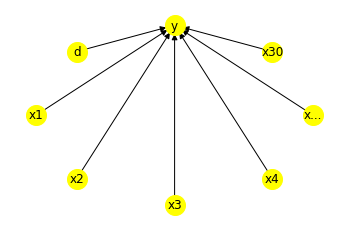

In [5]:

model=CausalModel(        data = df,
        treatment='d',
        outcome='y',
        graph="""graph[directed 1 node[id "x1" label "x1"]
                    node[id "x2" label "x2"]
                    node[id "x3" label "x3"]
                    node[id "x4" label "x4"]
                    node[id "x..." label "x..."]
                    node[id "x30" label "x30"]
                    node[id "y" label "y"]
                    node[id "d" label "d"]
                    
                    edge[source "x30" target "y"]
                    edge[source "x..." target "y"]
                    edge[source "x4" target "y"]
                    edge[source "x3" target "y"]
                    edge[source "x2" target "y"]
                    edge[source "x1" target "y"]
                    edge[source "d" target "y"]]"""

        )
model.view_model()

## 1 a ii Increments of features

* __What simulation__

In the following simulation, we explored increasing the number of features used, the number of samples used and changing the distribution of covariates between gaussian and bernoulli.

* __Simulation parameters__

We had 5 runs of each example.

Simulations: 100
Number of features: 10, 30, 60
Samples: 1000,10000,500000,1000000
C = 0.5 #hardcoded inference

Data generation:

* __Results__
DML holds well in all simulations. In simulations with small sample size there is a large CI but these are in zones which we would not expect to be working in (1000,10000 samples), once we reach 500,000 samples, the CI really shrink down. When using bernoulli features the CI is smaller compared to gaussian. 

Can be found inside the folder:
https://github.com/dscott-hbo/DoubleML/blob/master/simulation/Bernoulli/CIplots/CI_plots.pdf

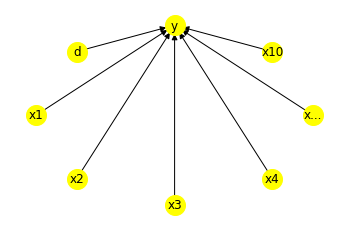

In [6]:
model=CausalModel(
        data = df,
        treatment='d',
        outcome='y',
        graph="""graph[directed 1 node[id "x1" label "x1"]
                    node[id "x2" label "x2"]
                    node[id "x3" label "x3"]
                    node[id "x4" label "x4"]
                    node[id "x..." label "x..."]
                    node[id "x10" label "x10"]
                    node[id "y" label "y"]
                    node[id "d" label "d"]
                    
                    edge[source "x10" target "y"]
                    edge[source "x..." target "y"]
                    edge[source "x4" target "y"]
                    edge[source "x3" target "y"]
                    edge[source "x2" target "y"]
                    edge[source "x1" target "y"]
                    edge[source "d" target "y"]]"""

        )
model.view_model()

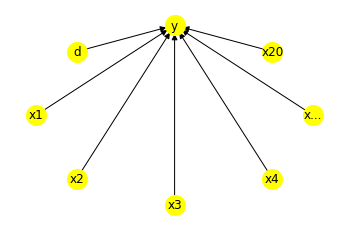

In [7]:
model=CausalModel(
        data = df,
        treatment='d',
        outcome='y',
        graph="""graph[directed 1 node[id "x1" label "x1"]
                    node[id "x2" label "x2"]
                    node[id "x3" label "x3"]
                    node[id "x4" label "x4"]
                    node[id "x..." label "x..."]
                    node[id "x20" label "x20"]
                    node[id "y" label "y"]
                    node[id "d" label "d"]
                    
                    edge[source "x20" target "y"]
                    edge[source "x..." target "y"]
                    edge[source "x4" target "y"]
                    edge[source "x3" target "y"]
                    edge[source "x2" target "y"]
                    edge[source "x1" target "y"]
                    edge[source "d" target "y"]]"""

        )
model.view_model()

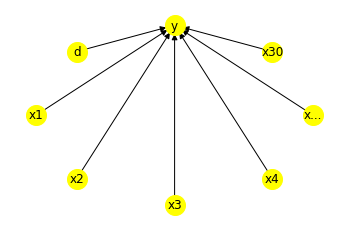

In [8]:
model=CausalModel(
        data = df,
        treatment='d',
        outcome='y',
        graph="""graph[directed 1 node[id "x1" label "x1"]
                    node[id "x2" label "x2"]
                    node[id "x3" label "x3"]
                    node[id "x4" label "x4"]
                    node[id "x..." label "x..."]
                    node[id "x30" label "x30"]
                    node[id "y" label "y"]
                    node[id "d" label "d"]
                    
                    edge[source "x30" target "y"]
                    edge[source "x..." target "y"]
                    edge[source "x4" target "y"]
                    edge[source "x3" target "y"]
                    edge[source "x2" target "y"]
                    edge[source "x1" target "y"]
                    edge[source "d" target "y"]]"""

        )
model.view_model()

## 1 b) with colinear features

* __What simulation__

In the following simulation, we explored using collinear features by duplicated either one or all of the variables in the dataset.

* __Simulation parameters__

We had 5 runs of each example.

Feature Distribution: Gaussian, Bernoulli
Simulations: 3
Number of features: 10
Samples: 1000000
C = 0.5 #hardcoded inference

* __Results__
DML nailed this simulation showing that collinearity does not effect DML inference.

Can be found inside the folder:
https://github.com/dscott-hbo/DoubleML/blob/master/simulation/Bernoulli/CollinearityDML.ipynb

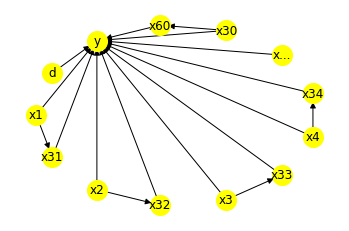

In [9]:
model=CausalModel(
        data = df,
        treatment='d',
        outcome='y',
        graph="""graph[directed 1 node[id "x1" label "x1"]
                    node[id "x31" label "x31"]
                    node[id "x2" label "x2"]
                    node[id "x32" label "x32"]
                    node[id "x3" label "x3"]
                    node[id "x33" label "x33"]
                    node[id "x4" label "x4"]
                    node[id "x34" label "x34"]
                    node[id "x..." label "x..."]
                    node[id "x30" label "x30"]                    
                    node[id "x60" label "x60"]
                    
                    node[id "y" label "y"]
                    node[id "d" label "d"]
                    
                    edge[source "x2" target "x32"]
                    edge[source "x3" target "x33"]
                    edge[source "x4" target "x34"]
                    edge[source "x30" target "x60"]
                    
                    
                    
                    edge[source "x60" target "y"]
                    edge[source "x34" target "y"]
                    edge[source "x33" target "y"]
                    edge[source "x32" target "y"]
                    edge[source "x31" target "y"]
                    edge[source "x30" target "y"]
                    edge[source "x..." target "y"]
                    edge[source "x4" target "y"]
                    edge[source "x3" target "y"]
                    edge[source "x2" target "y"]
                    edge[source "x1" target "y"]
                    edge[source "x1" target "x31"]
                    edge[source "d" target "y"]]"""

        )
model.view_model()

## 1 c) Predicting binary Y target

__What simulation__

In the following simulation, we explored using DML to predict a categoric Y, either 0 or 1 using bernoulli or gaussian features

__Simulation parameters__

We had 3 runs of each different distribution using 1000000 samples and 10 features
C = 0.5 #hardcoded inference

__Results__

The DML does not perform well at all. There is a lack of any evidence of DML being used to predict categorical target variables. TODO Try out with Cox-Box transformations

Can be found inside the folder: https://github.com/dscott-hbo/DoubleML/blob/master/simulation/Bernoulli/BernoulliY.ipynb

### TODO upto now

- Try various different distributions.
- Try using Cox-Box transformation of Y in categorical prediction
- Investigate the predicting categorical target with DML.

## 2. Underlying simulated features are only positive? (Exponential, Gamma, Chi-Sq)

## 3. Heavy tailed distribution (t, weibull, pareto)

## 4. What happens when we have vastly different scales in the features?

4.i  models where the treatment is the massively larger variable and all others are small

4.ii models where the treatment is small and one/two other features are larger.

## 5. Change of structure of output equation

#### 5.a Output ~ Treatment, Output ~ Treatment + X1, ...., 

#### 5.a ii change the independent feature distributions

#### 5.a iii change the scales

#### 5.a X1 and X2 highly correlated

## 6 graph more complex (more features, more relations, more depth)

## 7. What happens when Y is now a function of a function (i.e. a logistic function on some linear function of inputs)?  Can we estimate the change in log-odds?